<a href="https://colab.research.google.com/github/PrajwalKalpande/IPL-Score-and-Winner-Prediction/blob/main/IPL_ML_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from sklearn.linear_model import LinearRegression,ElasticNet, LogisticRegression
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.validation import check_array 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor 
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC,LinearSVR
from sklearn.metrics import f1_score,accuracy_score , roc_auc_score,roc_curve,precision_score,recall_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 

c:\Users\MAHIMA\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
import pandas as pd
%matplotlib inline
import pandas as pd
import numpy as np
import math,os
from numpy.random import choice
#import scikitplot as skplt
from time import time
import matplotlib.pyplot as plt
import sklearn


In [3]:
 import zipfile


In [4]:
data = pd.read_csv('ipl_data.csv')

C:\Users\MAHIMA\AppData\Local\Temp\ipykernel_12604\980206372.py:1: DtypeWarning:

Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,1,0,0,NaN,NaN,NaN,legbyes,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,1,0,0,NaN,NaN,NaN,wides,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008


In [6]:
#encoding the numeric values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
data["batting_team"]=encoder.fit_transform(data["batting_team"])
data['bowling_team']=encoder.fit_transform(data["bowling_team"])
data["winner"]=encoder.fit_transform(data["winner"].astype(str))
data["toss_winner"]=encoder.fit_transform(data["toss_winner"])
data["venue"]=encoder.fit_transform(data["venue"])
data["batsman"]=encoder.fit_transform(data["batsman"])
data["non_striker"]=encoder.fit_transform(data["non_striker"])
data["bowler"]=encoder.fit_transform(data["bowler"])
data["team1"]=encoder.fit_transform(data["team1"])
data["team2"]=encoder.fit_transform(data["team2"])

In [7]:
#outcome variable team1_win as team1 winning the match
data.loc[data["winner"]==data["team1"],"team1_win"]=1
data.loc[data["winner"]!=data["team1"],"team1_win"]=0

#outcome variable team1_toss_win as a value of team1 winning the toss
data.loc[data["toss_winner"]==data["team1"],"team1_toss_win"]=1
data.loc[data["toss_winner"]!=data["team1"],"team1_toss_win"]=0

#outcome variable team1_bat to depict if team1 bats first
data["team1_bat"]=0
data.loc[(data["team1_toss_win"]==1) & (data["toss_decision"]=="bat"),"team1_bat"]=1

In [8]:
data['ball'] = data['over'] + data['ball']/10.0


In [9]:
data['id_inning'] = data['id'].astype(str)+(data['batting_team']).astype(str)

data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,player_dismissed,fielder,extras_type,batting_team,bowling_team,year,team1_win,team1_toss_win,team1_bat,id_inning
0,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,...,NaN,NaN,legbyes,7,12,2008,0.0,1.0,0,3359827
1,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,...,NaN,NaN,NaN,7,12,2008,0.0,1.0,0,3359827
2,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,...,NaN,NaN,wides,7,12,2008,0.0,1.0,0,3359827
3,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,...,NaN,NaN,NaN,7,12,2008,0.0,1.0,0,3359827
4,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,...,NaN,NaN,NaN,7,12,2008,0.0,1.0,0,3359827


In [10]:
print(len(data['id'].unique()))
len(data['id_inning'].unique())
# As expected total innings played are twice of the total matches played

812


1624

In [11]:
data1 = data.copy()
data1 = data1.groupby(by=['id_inning']).sum()['total_runs'].reset_index()
data1.head()

,id_inning,total_runs
0,108259112,172
1,108259113,207
2,108259211,187
3,10825928,184
4,10825934,183


In [12]:
data2 = pd.merge(left=data1, right=data, on='id_inning', how='right')
print(data2.shape)
data2  = data2.set_index('id')
data2 


(193096, 40)


,id_inning,total_runs_x,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year,team1_win,team1_toss_win,team1_bat
id,,,,,,,,,,,,,,,,,,,,,
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,...,NaN,NaN,NaN,legbyes,7,12,2008,0.0,1.0,0
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,...,NaN,NaN,NaN,wides,7,12,2008,0.0,1.0,0
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237181,12371818,157,Dubai,2020-11-10,TA Boult,6,0,2,8,2,...,NaN,NaN,NaN,NaN,8,2,2020,0.0,1.0,1
1237181,12371818,157,Dubai,2020-11-10,TA Boult,6,0,2,8,2,...,NaN,NaN,NaN,NaN,8,2,2020,0.0,1.0,1
1237181,12371818,157,Dubai,2020-11-10,TA Boult,6,0,2,8,2,...,NaN,NaN,NaN,NaN,8,2,2020,0.0,1.0,1


In [13]:
data2.reset_index(inplace= True)
data2.head()

,id,id_inning,total_runs_x,city,date,player_of_match,venue,neutral_venue,team1,team2,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year,team1_win,team1_toss_win,team1_bat
0,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,legbyes,7,12,2008,0.0,1.0,0
1,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
2,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,wides,7,12,2008,0.0,1.0,0
3,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
4,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0


In [14]:
df = pd.DataFrame()
for i in range(len(data2['inning'].unique())):
    one_inning = data2.loc[data2['inning']==data2['inning'].unique()[i]]
    one_inning = one_inning.sort_values(['year','id_inning','over', 'ball'], ascending=[True,True,True, True])
    one_inning = one_inning[['id_inning','year','inning','ball','venue','batsman','bowler','batting_team','bowling_team',
                             'is_wicket','total_runs_y','total_runs_x','team1_toss_win','team1_win','team1_bat','team1','team2']].reset_index(drop=True)
    #the number of columns are high here since we need the later ones for winner prediction and earlier ones for score prediction                       
    one_inning['current_runs'] = one_inning.groupby(['id_inning'])['total_runs_y'].cumsum()
    one_inning['current_wickets'] = one_inning.groupby(['id_inning'])['is_wicket'].cumsum()
    

    one_inning.tail()
    frame = [df,one_inning]
    df = pd.concat(frame)
print(data2.shape)
print(df.shape)

(193096, 40)
(193096, 19)


In [15]:
df['runs_last5']= df['total_runs_y'].rolling(min_periods=1, window=30).sum()

In [16]:
df['wickets_last5']= df['is_wicket'].rolling(min_periods=1, window=30).sum()

In [17]:
df.head()

,id_inning,year,inning,ball,venue,batsman,bowler,batting_team,bowling_team,is_wicket,...,total_runs_x,team1_toss_win,team1_win,team1_bat,team1,team2,current_runs,current_wickets,runs_last5,wickets_last5
0,3359827,2008,1,1.1,14,431,264,7,12,0,...,222,1.0,0.0,0,12,7,1,0,1.0,0.0
1,3359827,2008,1,1.2,14,77,264,7,12,0,...,222,1.0,0.0,0,12,7,1,0,1.0,0.0
2,3359827,2008,1,1.3,14,77,264,7,12,0,...,222,1.0,0.0,0,12,7,2,0,2.0,0.0
3,3359827,2008,1,1.4,14,77,264,7,12,0,...,222,1.0,0.0,0,12,7,2,0,2.0,0.0
4,3359827,2008,1,1.5,14,77,264,7,12,0,...,222,1.0,0.0,0,12,7,2,0,2.0,0.0


In [18]:
df = df[df['ball'].astype(int)>=5]
df.head()

,id_inning,year,inning,ball,venue,batsman,bowler,batting_team,bowling_team,is_wicket,...,total_runs_x,team1_toss_win,team1_win,team1_bat,team1,team2,current_runs,current_wickets,runs_last5,wickets_last5
26,3359827,2008,1,5.1,14,431,264,7,12,0,...,222,1.0,0.0,0,12,7,54,0,54.0,0.0
27,3359827,2008,1,5.2,14,431,264,7,12,0,...,222,1.0,0.0,0,12,7,55,0,55.0,0.0
28,3359827,2008,1,5.3,14,77,264,7,12,0,...,222,1.0,0.0,0,12,7,59,0,59.0,0.0
29,3359827,2008,1,5.4,14,77,264,7,12,0,...,222,1.0,0.0,0,12,7,59,0,59.0,0.0
30,3359827,2008,1,5.5,14,77,264,7,12,0,...,222,1.0,0.0,0,12,7,60,0,59.0,0.0


In [19]:
#no need to uncomment and run last line in this cell. It was used to save data for loading again in training Deep learning models in another
#colab notebook. Has no relevance with the code here. 
# df.to_csv("/content/drive/MyDrive/WiDS_IPL/ipl_predict_winner_dl.csv", index=True)

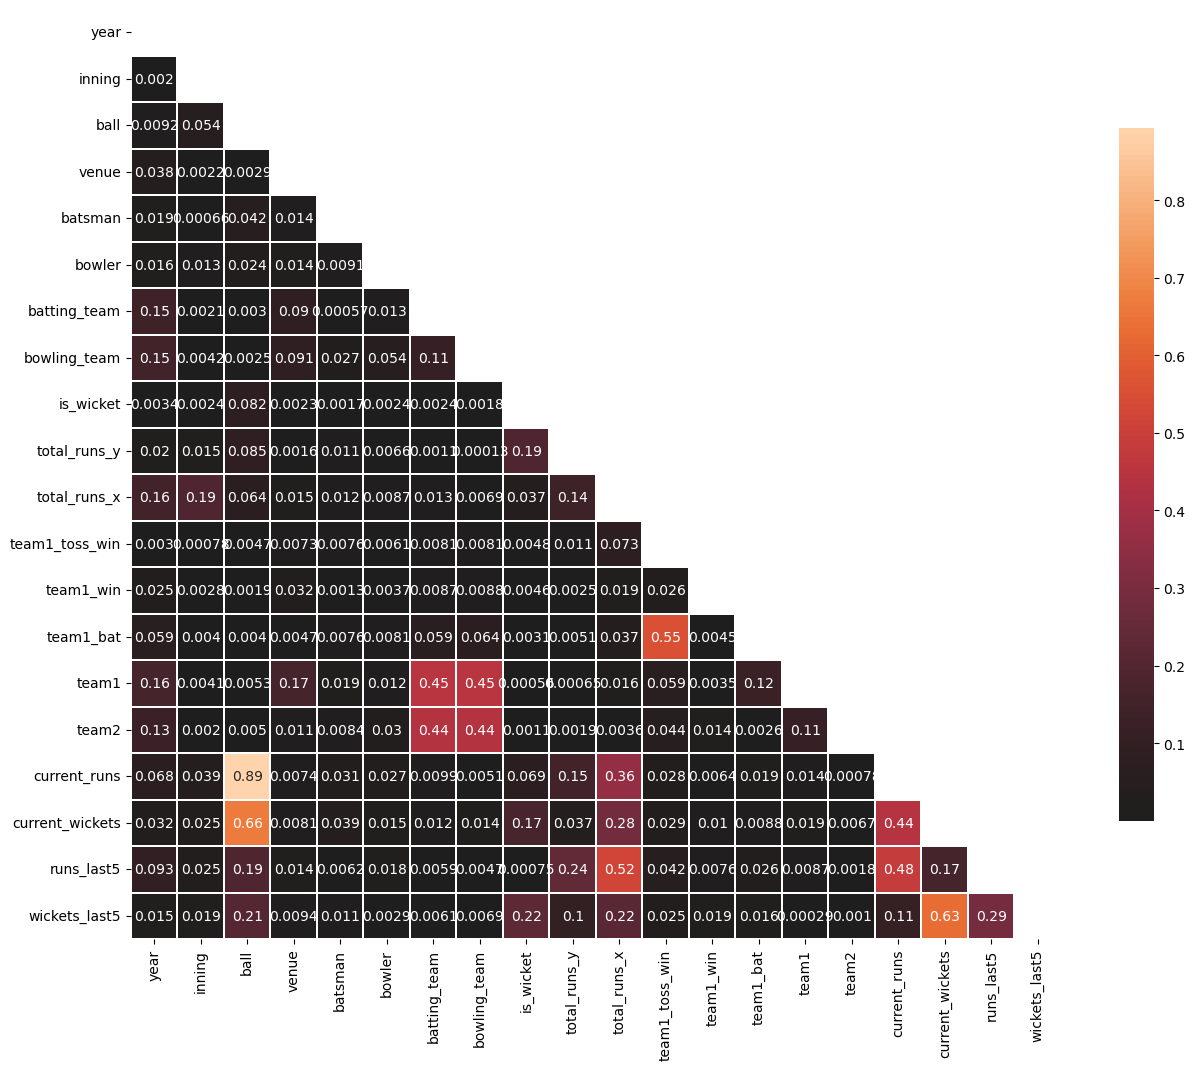

In [20]:
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=bool) )

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 18))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap =  sns.diverging_palette(150, 275, s=80, l=55, n=20,as_cmap=True) 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,    center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5},annot=True)
plt.show()

In [21]:
X_train_data = df[df['year'] <2020]
X_train_data.tail()

,id_inning,year,inning,ball,venue,batsman,bowler,batting_team,bowling_team,is_wicket,...,total_runs_x,team1_toss_win,team1_win,team1_bat,team1,team2,current_runs,current_wickets,runs_last5,wickets_last5
86200,11817680,2019,2,20.2,24,372,350,0,8,0,...,148,1.0,1.0,1,8,0,143,5,58.0,1.0
86201,11817680,2019,2,20.3,24,456,350,0,8,0,...,148,1.0,1.0,1,8,0,145,5,60.0,1.0
86202,11817680,2019,2,20.4,24,456,350,0,8,1,...,148,1.0,1.0,1,8,0,146,6,59.0,2.0
86203,11817680,2019,2,20.5,24,448,350,0,8,0,...,148,1.0,1.0,1,8,0,148,6,61.0,2.0
86204,11817680,2019,2,20.6,24,448,350,0,8,1,...,148,1.0,1.0,1,8,0,148,7,60.0,3.0


In [22]:
X_test_data = df[df['year']==2020]


In [23]:
X_train_data.drop(columns= ['id_inning'],inplace = True)
X_test_data.drop(columns= ['id_inning'],inplace = True)

In [24]:
X_train_data.head()

,year,inning,ball,venue,batsman,bowler,batting_team,bowling_team,is_wicket,total_runs_y,total_runs_x,team1_toss_win,team1_win,team1_bat,team1,team2,current_runs,current_wickets,runs_last5,wickets_last5
26,2008,1,5.1,14,431,264,7,12,0,4,222,1.0,0.0,0,12,7,54,0,54.0,0.0
27,2008,1,5.2,14,431,264,7,12,0,1,222,1.0,0.0,0,12,7,55,0,55.0,0.0
28,2008,1,5.3,14,77,264,7,12,0,4,222,1.0,0.0,0,12,7,59,0,59.0,0.0
29,2008,1,5.4,14,77,264,7,12,0,0,222,1.0,0.0,0,12,7,59,0,59.0,0.0
30,2008,1,5.5,14,77,264,7,12,0,1,222,1.0,0.0,0,12,7,60,0,59.0,0.0


In [25]:
data = pd.read_csv('Data/ipl_predict_winner.csv')

C:\Users\MAHIMA\AppData\Local\Temp\ipykernel_12604\3072929002.py:1: DtypeWarning:

Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.



In [26]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data.head()

,id,id_inning,total_runs_x,city,date,player_of_match,venue,neutral_venue,team1,team2,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year,team1_win,team1_toss_win,team1_bat
0,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,legbyes,7,12,2008,0.0,1.0,0
1,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
2,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,wides,7,12,2008,0.0,1.0,0
3,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
4,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0


In [27]:
df = pd.DataFrame()
for i in range(len(data['id'].unique())):
    one_inning = data.loc[data['id']==data['id'].unique()[i]]
    one_inning = one_inning.sort_values(['inning'],ascending=[True])
    row = one_inning.iloc[1]
    row['target_score'] = row['total_runs_x']
    row =row[['year','venue','team1_toss_win','team1_bat','target_score','team1','team2','team1_win']]
    temp = pd.DataFrame(columns =row.index)
    temp.loc[0]=row.values
    frame = [df,temp]
    df = pd.concat(frame)
print(data.shape)
print(df.shape)

(193096, 40)
(812, 8)


In [28]:
len(data['id'].unique())

812

In [29]:
df

,year,venue,team1_toss_win,team1_bat,target_score,team1,team2,team1_win
0,2008,14,1.0,0,222,12,7,0.0
0,2008,23,0.0,0,240,5,0,0.0
0,2008,8,0.0,0,129,3,10,1.0
0,2008,35,1.0,1,165,8,12,0.0
0,2008,7,0.0,0,110,7,1,1.0
...,...,...,...,...,...,...,...,...
0,2020,6,0.0,0,201,12,8,1.0
0,2020,6,0.0,0,200,8,2,1.0
0,2020,30,0.0,0,131,12,13,0.0
0,2020,30,1.0,1,189,2,13,1.0


In [30]:
df_win = df.copy()

In [31]:
df_win.drop('year',axis=1,inplace=True)
# removing year from feature importance process

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [33]:
len(df_win.columns)

7

In [34]:
X = df_win.iloc[:,0:6]  #independent columns
y = df_win.iloc[:,6]    #target column i.e price range
y = y_encoded = label_encoder.fit_transform(y)
model = ExtraTreesClassifier()
model.fit(X ,y )
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)


[0.18527617 0.02334242 0.02796925 0.40795739 0.14042346 0.21503131]


c:\Users\MAHIMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



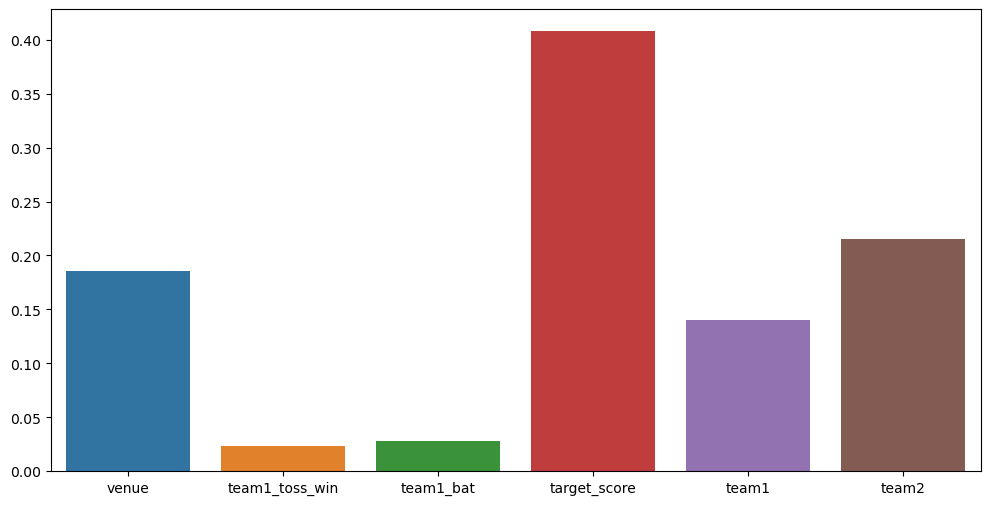

In [35]:
fig = plt.figure(figsize=(12,6))
sns.barplot(feat_importances.index,feat_importances.values)
plt.show()

In [36]:
class_feature_columns=feat_importances.index

In [37]:
X_win_train_data= df[df['year']<2020] 
X_win_test_data= df[df['year']==2020] 
# X_win_train_data = X_win_train_data[X_win_train_data['year']>2012]

In [38]:
len(X_win_train_data)

752

In [39]:
X_win_train_data.head()

,year,venue,team1_toss_win,team1_bat,target_score,team1,team2,team1_win
0,2008,14,1.0,0,222,12,7,0.0
0,2008,23,0.0,0,240,5,0,0.0
0,2008,8,0.0,0,129,3,10,1.0
0,2008,35,1.0,1,165,8,12,0.0
0,2008,7,0.0,0,110,7,1,1.0


In [40]:
X_win_train_data.drop('year',axis=1,inplace=True)
X_win_test_data.drop('year',axis=1,inplace=True)

In [41]:
class_feature_columns

Index(['venue', 'team1_toss_win', 'team1_bat', 'target_score', 'team1',
       'team2'],
      dtype='object')

In [42]:
target= 'team1_win'
X_train = X_win_train_data[class_feature_columns]
X_test = X_win_test_data[class_feature_columns]
y_train = label_encoder.fit_transform(X_win_train_data[target])
y_test = label_encoder.fit_transform(X_win_test_data[target])

In [43]:
X_train.columns

Index(['venue', 'team1_toss_win', 'team1_bat', 'target_score', 'team1',
       'team2'],
      dtype='object')

In [44]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#standardizing the data

In [45]:
target= 'team1_win'
X_train1 = X_win_train_data[class_feature_columns]
X_test1 = X_win_test_data[class_feature_columns]

In [46]:
sc = MinMaxScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)
#standardizing the data

In [47]:
def class_report(y_test,y_pred):
  f1 = f1_score(y_test,y_pred)
  acc = accuracy_score(y_test,y_pred)
  rocauc = roc_auc_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred) 
  return {'F1_score':f1,'Accuracy':acc,'Area under ROC curve':rocauc,'Precision':precision,'Recall':recall}

### Logistic Regression

In [48]:
print(len(y_train[y_train==1]))
print(len(y_train[y_train==0]))

415
337


In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [50]:
result = class_report(y_test,y_pred)

In [51]:
result

{'F1_score': 0.627906976744186,
 'Accuracy': 0.4666666666666667,
 'Area under ROC curve': 0.4666666666666667,
 'Precision': 0.48214285714285715,
 'Recall': 0.9}

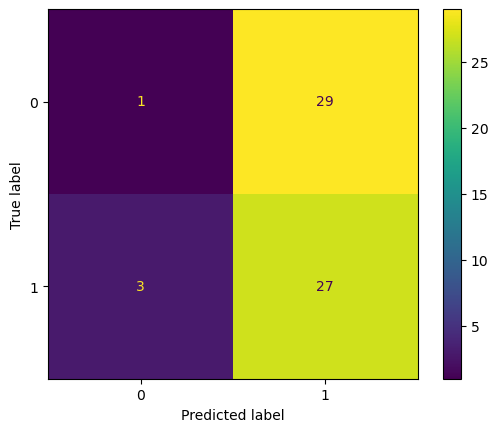

In [52]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

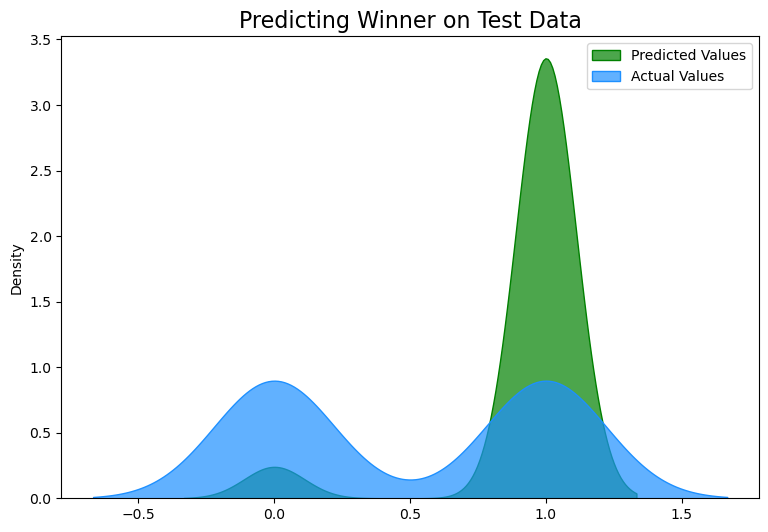

In [53]:
fig = plt.figure(figsize=(9,6))
# xaxis = np.arange(1, y_pred.shape[0]+1,1)
sns.kdeplot(y_pred, shade=True, color="g", label="Predicted Values", alpha=.7)
sns.kdeplot(y_test, shade=True, color="dodgerblue", label="Actual Values", alpha=.7)
plt.title('Predicting Winner on Test Data', fontsize=16)
plt.legend()
plt.show()

In [54]:
logreg = LogisticRegression()
logreg.fit(X_train1, y_train)
y_pred = logreg.predict(X_test1)
result = class_report(y_test,y_pred)
print(result)

{'F1_score': 0.6363636363636364, 'Accuracy': 0.4666666666666667, 'Area under ROC curve': 0.4666666666666667, 'Precision': 0.4827586206896552, 'Recall': 0.9333333333333333}


### Decision Tree Classifier

In [55]:
#Decision Tree Classifier
dtree=DecisionTreeClassifier(max_depth=40)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))
 

Accuracy of Decision Tree Classifier on test set: 0.5500


In [56]:
result = class_report(y_test,y_pred)
print(result)

{'F1_score': 0.49056603773584906, 'Accuracy': 0.55, 'Area under ROC curve': 0.55, 'Precision': 0.5652173913043478, 'Recall': 0.43333333333333335}


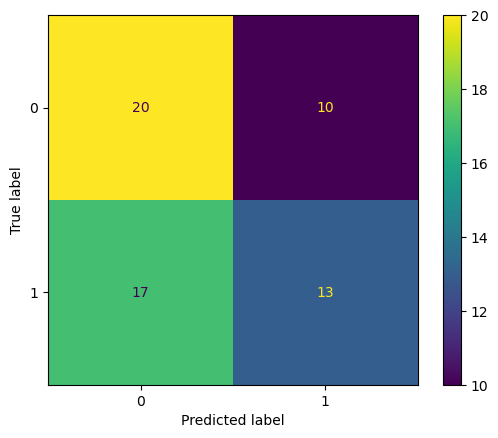

In [57]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

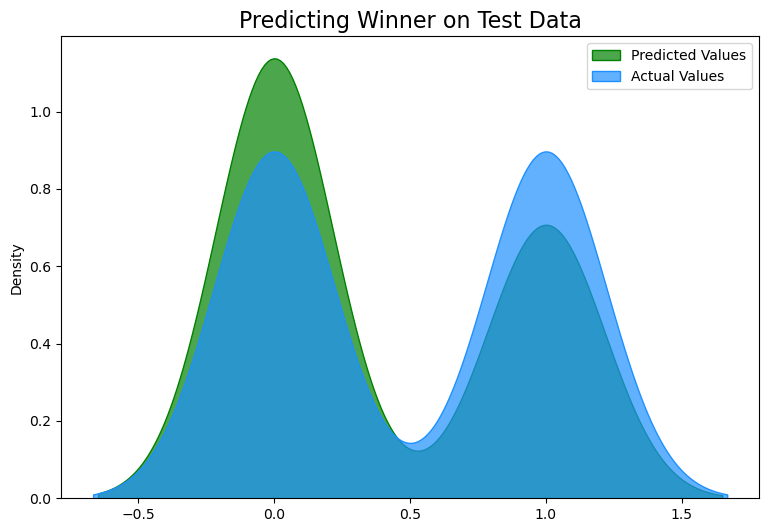

In [58]:
fig = plt.figure(figsize=(9,6))
# xaxis = np.arange(1, y_pred.shape[0]+1,1)
sns.kdeplot(y_pred, shade=True, color="g", label="Predicted Values", alpha=.7)
sns.kdeplot(y_test, shade=True, color="dodgerblue", label="Actual Values", alpha=.7)
plt.title('Predicting Winner on Test Data', fontsize=16)
plt.legend()
plt.show()

In [59]:
#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train1,y_train)
y_pred = dtree.predict(X_test1)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(dtree.score(X_test1, y_test)))
#Standard Scaler

Accuracy of Decision Tree Classifier on test set: 0.5667


### SVM

In [60]:
n = 10
#SVM
SVC = SVC(kernel="linear", C=0.5).fit(X_train,y_train)


In [61]:
y_pred = SVC.predict(X_test)
print('Accuracy of SVM Classifier on test set: {:.4f}'.format(SVC.score(X_test, y_test)))


Accuracy of SVM Classifier on test set: 0.5000


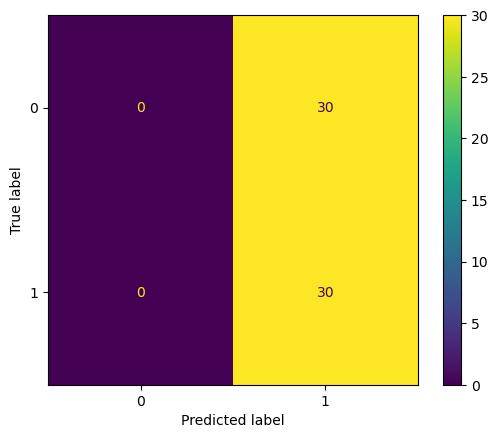

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVC.classes_)
disp.plot()
plt.show()

### Random Forest

In [63]:
#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=10,max_depth = 100)
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))


Accuracy of Random Forest Classifier on test set: 0.5000


In [64]:
result = class_report(y_test,y_pred)
print(result)

{'F1_score': 0.3478260869565218, 'Accuracy': 0.5, 'Area under ROC curve': 0.5, 'Precision': 0.5, 'Recall': 0.26666666666666666}


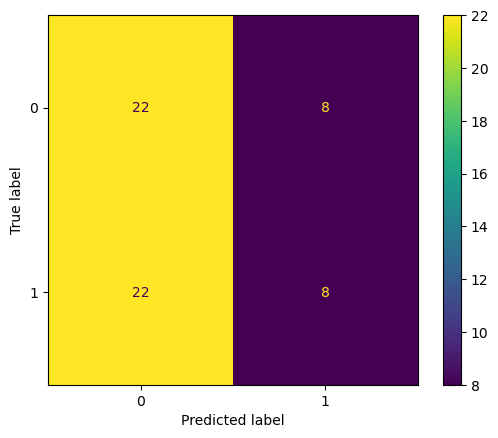

In [65]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

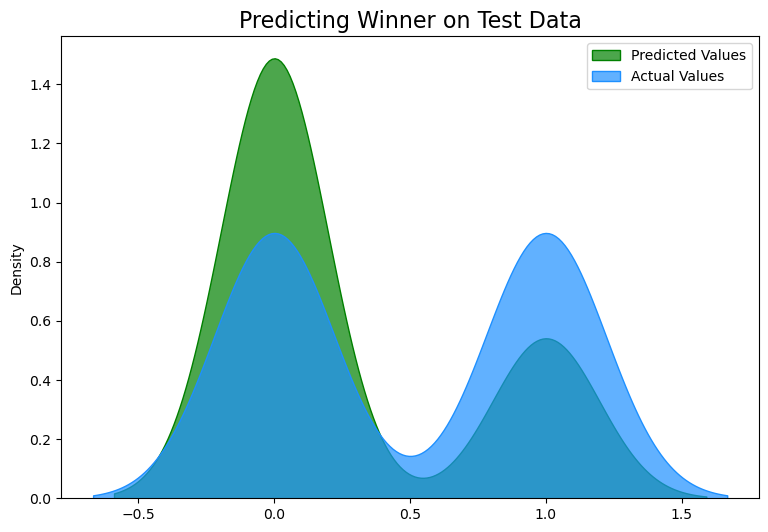

In [66]:
fig = plt.figure(figsize=(9,6))
# xaxis = np.arange(1, y_pred.shape[0]+1,1)
sns.kdeplot(y_pred, shade=True, color="g", label="Predicted Values", alpha=.7)
sns.kdeplot(y_test, shade=True, color="dodgerblue", label="Actual Values", alpha=.7)
plt.title('Predicting Winner on Test Data', fontsize=16)
plt.legend()
plt.show()

In [67]:
#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=20,max_depth = 250)
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))


Accuracy of Random Forest Classifier on test set: 0.5833


Fine-tuning RF Classifier

In [68]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,25,50,100,250,500]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [69]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 25, 50, 100, 250,
                                                      500],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [70]:
rf_random.best_params_

{'n_estimators': 1155,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [71]:
rf_random.best_score_

0.6077237715803453

In [72]:
frame = pd.DataFrame(rf_random.cv_results_)

In [73]:
frame.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.060694,0.419788,0.415013,0.048392,2000,2,1,sqrt,500,False,"{'n_estimators': 2000, 'min_samples_split': 2,...",0.601594,0.573705,0.544,0.573100,0.023516,98
1,5.818760,0.466611,0.346612,0.040905,1788,2,2,sqrt,100,True,"{'n_estimators': 1788, 'min_samples_split': 2,...",0.613546,0.569721,0.600,0.594422,0.018321,25
2,1.938274,0.070405,0.192625,0.029506,733,2,1,sqrt,500,False,"{'n_estimators': 733, 'min_samples_split': 2, ...",0.597610,0.577689,0.548,0.574433,0.020383,96
3,2.096885,0.289559,0.223410,0.074112,733,2,2,auto,10,False,"{'n_estimators': 733, 'min_samples_split': 2, ...",0.593625,0.597610,0.584,0.591745,0.005713,40
4,5.707986,0.272032,0.558674,0.131866,1788,2,4,auto,250,True,"{'n_estimators': 1788, 'min_samples_split': 2,...",0.601594,0.557769,0.588,0.582454,0.018316,80


In [74]:
#Random Forest Classifier
randomForest= RandomForestClassifier(bootstrap=False,
 max_depth= 250,
 max_features='auto',
 min_samples_leaf= 2,
 min_samples_split=10
 ,n_estimators=1155)
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))


Accuracy of Random Forest Classifier on test set: 0.5833


In [75]:
y_pred= rf_random.best_estimator_.predict(X_test)

In [76]:
class_report(y_test,y_pred)

{'F1_score': 0.5614035087719299,
 'Accuracy': 0.5833333333333334,
 'Area under ROC curve': 0.5833333333333333,
 'Precision': 0.5925925925925926,
 'Recall': 0.5333333333333333}

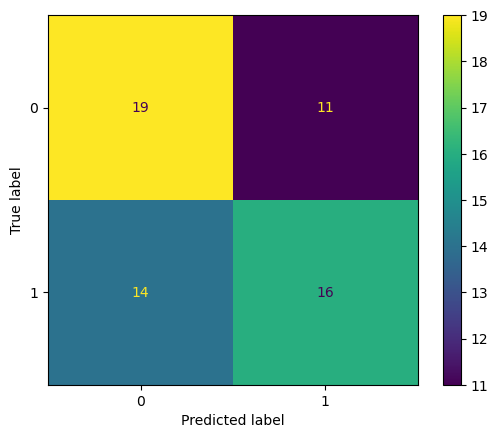

In [77]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Tuning again on lower n_estimator values


In [78]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.arange(5, 100,5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,25,50,100,250,500]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [79]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 25, 50, 100, 250,
                                                      500],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50, 55, 60,
                                                         65, 70, 75, 80, 85, 90,
                                                         95]},
                   random_state=42, verbose=2)

In [80]:
print(rf_random.best_params_)
print(f"The best score obtained was :{rf_random.best_score_}")

{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
The best score obtained was :0.6037290836653386


In [81]:
y_pred= rf_random.best_estimator_.predict(X_test)

In [82]:
class_report(y_test,y_pred)

{'F1_score': 0.5333333333333333,
 'Accuracy': 0.5333333333333333,
 'Area under ROC curve': 0.5333333333333333,
 'Precision': 0.5333333333333333,
 'Recall': 0.5333333333333333}

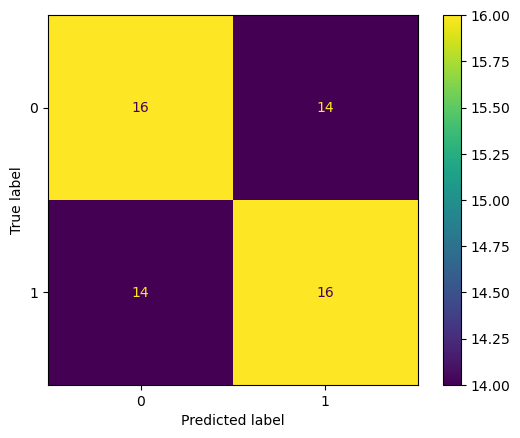

In [83]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

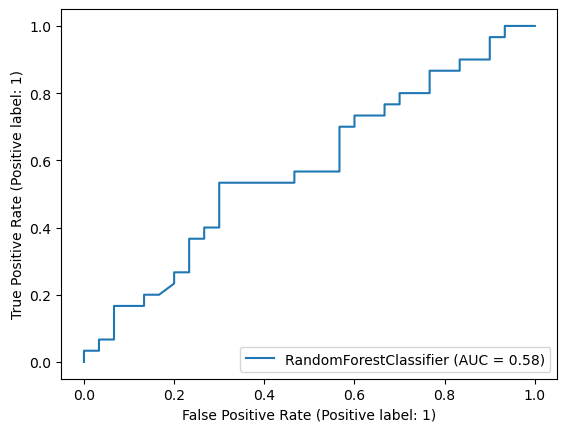

In [84]:
from sklearn import metrics
display = metrics.RocCurveDisplay.from_estimator(rf_random.best_estimator_,X_test,y_test)
plt.show()